## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

## Train Model with MNIST Dataset

In [2]:
tf.random.set_seed(42)

In [3]:
hand = mnist.load_data()

In [4]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

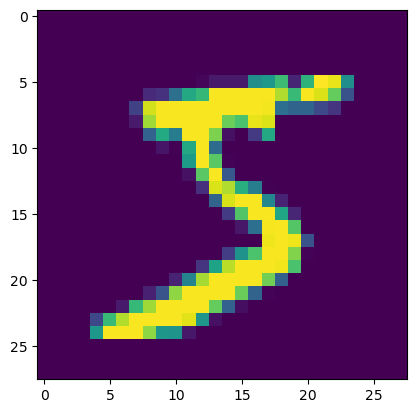

In [10]:
plt.imshow(X_train[0])

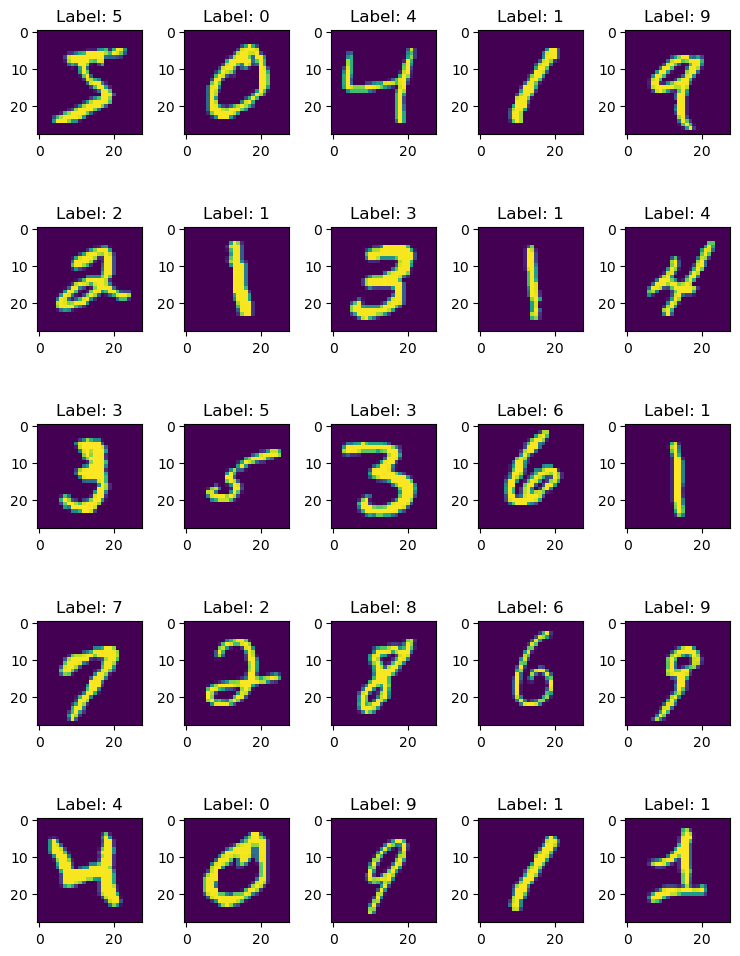

In [11]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## Preprocess Input Data

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255
X_test /= 255

In [15]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


## Compile and Run Test 

In [18]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\18478\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8774 - loss: 0.3922
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9743 - loss: 0.0880
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9809 - loss: 0.0623
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9846 - loss: 0.0532
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9867 - loss: 0.0444
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9869 - loss: 0.0422
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9891 - loss: 0.0351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9900 - loss: 0.0317
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9910 - loss: 0.0266
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9909 - loss: 0.0292


In [20]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 3s - 11ms/step - accuracy: 0.9904 - loss: 0.0338


In [21]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [22]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1131    2    1    0    1    0    0    0    0]
 [   1    2 1023    0    0    0    1    5    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    1    0  968    0    4    0    3    6]
 [   0    0    0    5    0  885    1    1    0    0]
 [   3    3    0    0    1    4  946    0    1    0]
 [   0    2    7    2    0    0    0 1014    1    2]
 [   4    1    2    1    0    0    0    1  961    4]
 [   1    1    0    1    2    4    0    3    3  994]]


## Read in Real Handwriting Data Images

In [23]:
path = r"C:\Users\18478\OneDrive\Desktop\Career Foundry Data Analytics Course\Career Foundry Machine Learning"

In [26]:
# Check an image example

img = Image.open(os.path.join(path, 'Visualizations/handwritten/0.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(283, 412)
L


## Preprocess Data Images

In [27]:
# Define the list of numbers (0-9) for the labels
labels = list(range(10))

# Initialize lists to store the image data and labels
images = []
image_labels = []

# Loop through all numbers (0-9) and load corresponding images
for label in labels:
    # Open the image
    img_path = os.path.join(path, 'Visualizations/handwritten', f'{label}.jpg')
    img = Image.open(img_path)
    
    # Convert the image to grayscale (one single channel)
    img = img.convert('L')
    
    # Resize the image to 28x28
    newsize = (28, 28)
    img_resized = img.resize(newsize)
    
    # Convert the image to a numpy array
    img_array = np.asarray(img_resized)
    
    # Normalize the image data to the range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to match the CNN input format: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    # Append the processed image and label to the respective lists
    images.append(img_array)
    image_labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# One-hot encode the labels for CNN training
image_labels = to_categorical(image_labels, num_classes=10)

# Check the shapes of the images and labels
print("Images shape:", images.shape)  # Should be (10, 28, 28, 1) for 10 images
                                      # each resized to 28x28 and with 1 channel (grayscale)
print("Labels shape:", image_labels.shape)  # Should be (10, 10) for 10 images 
                                            #with 10 possible class labels (0-9)

Images shape: (10, 28, 28, 1)
Labels shape: (10, 10)


## Run the Model on Real Handwriting Images

In [28]:
# Rename arrays

X_real_test = images  # Your preprocessed handwritten images
y_real_test = labels  # The true labels (0-9) for your handwritten images

In [29]:
# Run the model's predictions on the handwritten data
predictions = model.predict(X_real_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [30]:
# Get the predicted class (the index of the maximum value in the output array)

predicted_labels = np.argmax(predictions, axis=1)

In [31]:
# Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_real_test, predicted_labels)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 30.00%


In [32]:
# Display the predicted and true labels

for i, (pred, actual) in enumerate(zip(predicted_labels, y_real_test)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 2, Actual = 0
Image 1: Predicted = 2, Actual = 1
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 3, Actual = 3
Image 4: Predicted = 8, Actual = 4
Image 5: Predicted = 8, Actual = 5
Image 6: Predicted = 8, Actual = 6
Image 7: Predicted = 3, Actual = 7
Image 8: Predicted = 8, Actual = 8
Image 9: Predicted = 3, Actual = 9
